СВОДНЫЕ ГРАФИКИ ПО ВСЕМ СЦЕНАРИЯМ


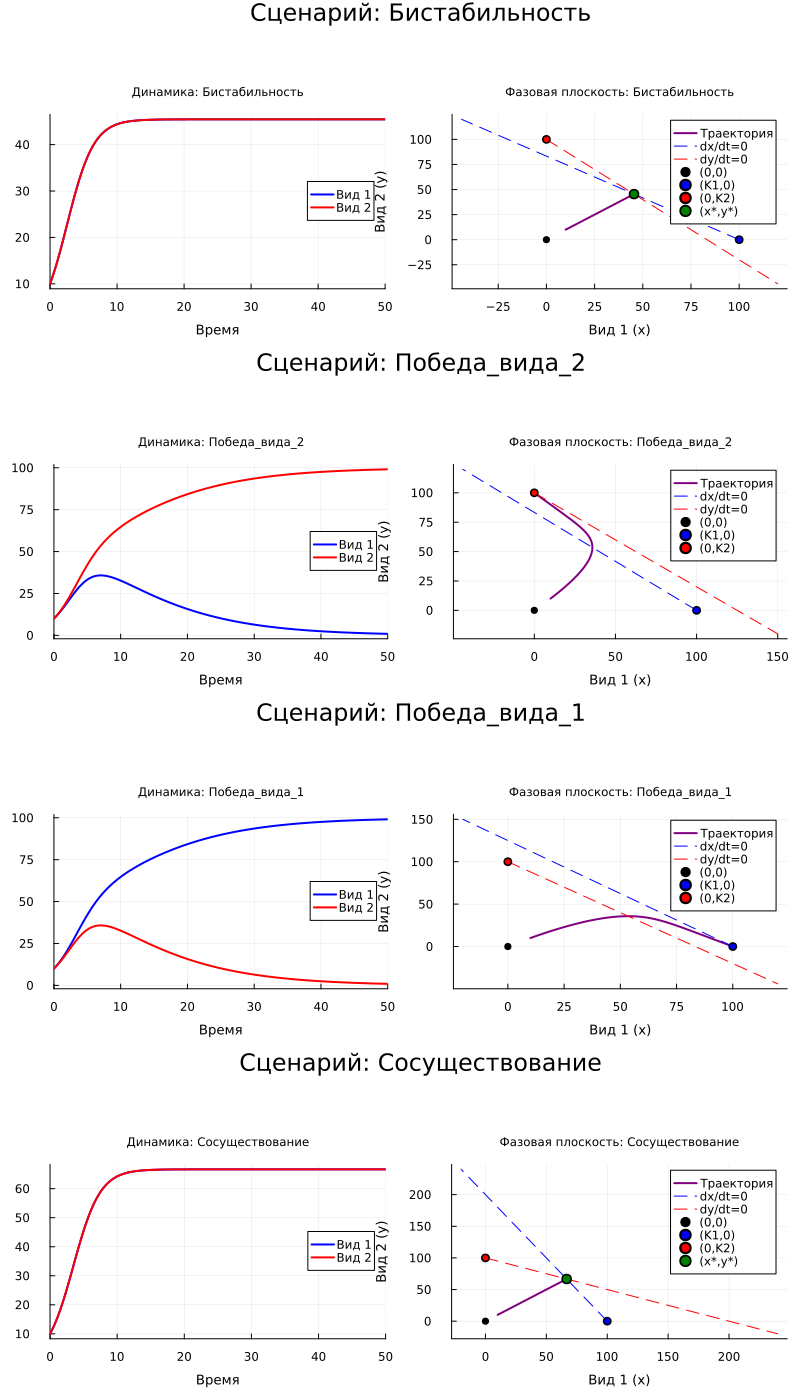

АНАЛИЗ УСЛОВИЙ СУЩЕСТВОВАНИЯ ВИДОВ

СЦЕНАРИЙ: Бистабильность
Параметры: r₁=0.5, r₂=0.5, K₁=100.0, K₂=100.0, α₁₂=1.2, α₂₁=1.2
Критерии:
  α₁₂ < K₁/K₂ → 1.2 < 1.0 → НЕТ
  α₂₁ < K₂/K₁ → 1.2 < 1.0 → НЕТ
РЕЗУЛЬТАТ: 🟡 БИСТАБИЛЬНОСТЬ
--------------------------------------------------

СЦЕНАРИЙ: Победа_вида_2
Параметры: r₁=0.5, r₂=0.5, K₁=100.0, K₂=100.0, α₁₂=1.2, α₂₁=0.8
Критерии:
  α₁₂ < K₁/K₂ → 1.2 < 1.0 → НЕТ
  α₂₁ < K₂/K₁ → 0.8 < 1.0 → ДА
РЕЗУЛЬТАТ: 🔵 ПОБЕДА ВИДА 2
--------------------------------------------------

СЦЕНАРИЙ: Победа_вида_1
Параметры: r₁=0.5, r₂=0.5, K₁=100.0, K₂=100.0, α₁₂=0.8, α₂₁=1.2
Критерии:
  α₁₂ < K₁/K₂ → 0.8 < 1.0 → ДА
  α₂₁ < K₂/K₁ → 1.2 < 1.0 → НЕТ
РЕЗУЛЬТАТ: 🔴 ПОБЕДА ВИДА 1
--------------------------------------------------

СЦЕНАРИЙ: Сосуществование
Параметры: r₁=0.5, r₂=0.5, K₁=100.0, K₂=100.0, α₁₂=0.5, α₂₁=0.5
Критерии:
  α₁₂ < K₁/K₂ → 0.5 < 1.0 → ДА
  α₂₁ < K₂/K₁ → 0.5 < 1.0 → ДА
РЕЗУЛЬТАТ: 🟢 УСТОЙЧИВОЕ СУЩЕСТВОВАНИЕ
-----------------------------------------

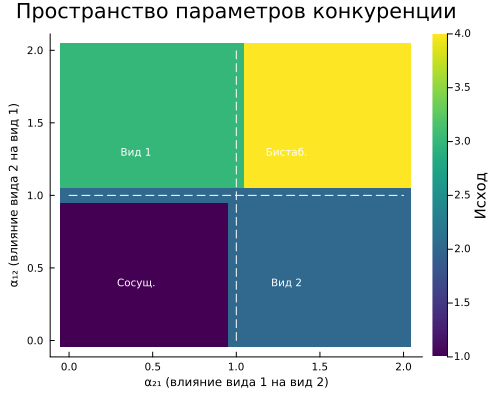

"C:\\Users\\konno\\work\\study\\2025\\science_2025-2026\\5_Пространство_параметров.png"

In [2]:
using DifferentialEquations
using Plots
using LaTeXStrings

# Классическая модель Лотки-Вольтерра для конкуренции двух видов
function lotka_volterra_competition!(du, u, p, t)
    x, y = u  # Численности видов 1 и 2
    r1, r2, K1, K2, α12, α21 = p  # Параметры модели

    # Динамика вида 1: рост ограничен собственной емкостью среды и конкуренцией
    du[1] = r1 * x * (1 - (x + α12 * y) / K1)

    # Динамика вида 2: рост ограничен собственной емкостью среды и конкуренцией
    du[2] = r2 * y * (1 - (y + α21 * x) / K2)
end

# Параметры для четырех сценариев конкуренции
params_scenarios = Dict(
    :Сосуществование => [0.5, 0.5, 100.0, 100.0, 0.5, 0.5],      # Оба вида сосуществуют
    :Победа_вида_1 => [0.5, 0.5, 100.0, 100.0, 0.8, 1.2],       # Вид 1 вытесняет вид 2
    :Победа_вида_2 => [0.5, 0.5, 100.0, 100.0, 1.2, 0.8],       # Вид 2 вытесняет вид 1
    :Бистабильность => [0.5, 0.5, 100.0, 100.0, 1.2, 1.2]       # Исход зависит от начальных условий
)

# Начальные условия (одинаковые для всех сценариев)
u0 = [10.0, 10.0]  # Начальные численности видов
tspan = (0.0, 50.0)  # Временной интервал моделирования


default_plot_settings = Dict(
    :legend_font_size => 8,
    :title_font_size => 10,
    :axis_font_size => 9,
    :label_font_size => 8,
    :marker_size => 4,
    :line_width => 2,
    :legend_position => :topright
)

# Создаем коллекцию для хранения графиков
plots = []


for (scenario_name, params) in params_scenarios

    # Решаем систему дифференциальных уравнений
    prob = ODEProblem(lotka_volterra_competition!, u0, tspan, params)
    sol = solve(prob, Tsit5(), saveat=0.1)

    # ГРАФИК 1: Динамика численности во времени
    p1 = plot(sol,
             label=["Вид 1" "Вид 2"],
             linewidth=default_plot_settings[:line_width],
             title="Динамика: $scenario_name",
             xlabel="Время",
             ylabel="Численность",
             legend=:right,
             grid=true,
             color=[:blue :red],
             legend_fontsize=default_plot_settings[:legend_font_size],
             title_fontsize=default_plot_settings[:title_font_size],
             guidefontsize=default_plot_settings[:axis_font_size],
             tickfontsize=default_plot_settings[:label_font_size],
             size=(400, 300))

    # ГРАФИК 2: Фазовая плоскость
    p2 = plot(sol[1,:], sol[2,:],
             linewidth=default_plot_settings[:line_width],
             label="Траектория",
             title="Фазовая плоскость: $scenario_name",
             xlabel="Вид 1 (x)",
             ylabel="Вид 2 (y)",
             legend=:topright,
             grid=true,
             color=:purple,
             legend_fontsize=default_plot_settings[:legend_font_size],
             title_fontsize=default_plot_settings[:title_font_size],
             guidefontsize=default_plot_settings[:axis_font_size],
             tickfontsize=default_plot_settings[:label_font_size],
             size=(400, 300))

    # Добавляем изоклины нулевого роста
    r1, r2, K1, K2, α12, α21 = params

    # Изоклина для вида 1 (dx/dt = 0): x = K1 - α12*y
    y_range = 0:0.1:max(K1/α12, K2)*1.2
    x_isocline1 = K1 .- α12 .* y_range
    plot!(p2, x_isocline1, y_range,
          linestyle=:dash,
          linewidth=default_plot_settings[:line_width]-1,
          label="dx/dt=0",
          color=:blue)

    # Изоклина для вида 2 (dy/dt = 0): y = K2 - α21*x
    x_range = 0:0.1:max(K1, K2/α21)*1.2
    y_isocline2 = K2 .- α21 .* x_range
    plot!(p2, x_range, y_isocline2,
          linestyle=:dash,
          linewidth=default_plot_settings[:line_width]-1,
          label="dy/dt=0",
          color=:red)

    # Отмечаем стационарные точки
    scatter!(p2, [0], [0],
             markersize=default_plot_settings[:marker_size],
             color=:black, label="(0,0)")
    scatter!(p2, [K1], [0],
             markersize=default_plot_settings[:marker_size],
             color=:blue, label="(K1,0)")
    scatter!(p2, [0], [K2],
             markersize=default_plot_settings[:marker_size],
             color=:red, label="(0,K2)")

    # Нетривиальная точка сосуществования (если существует)
    det = 1 - α12 * α21
    if det ≠ 0
        x_star = (K1 - α12 * K2) / det
        y_star = (K2 - α21 * K1) / det
        if x_star > 0 && y_star > 0
            scatter!(p2, [x_star], [y_star],
                    markersize=default_plot_settings[:marker_size]+1,
                    color=:green,
                    label="(x*,y*)")
        end
    end

    # Объединяем оба графика для текущего сценария
    p_combined = plot(p1, p2,
                     layout=(1,2),
                     size=(800, 350),
                     plot_title="Сценарий: $scenario_name",
                     titlefontsize=8)

    push!(plots, p_combined)
end


println("СВОДНЫЕ ГРАФИКИ ПО ВСЕМ СЦЕНАРИЯМ")
final_plot = plot(plots..., layout=(4,1), size=(800, 1400))  # Уменьшил общую высоту
display(final_plot)


println("АНАЛИЗ УСЛОВИЙ СУЩЕСТВОВАНИЯ ВИДОВ")

for (scenario_name, params) in params_scenarios
    r1, r2, K1, K2, α12, α21 = params

    # Условия устойчивого сосуществования:
    condition1 = α12 < K1/K2  # Влияние вида 2 на вид 1 должно быть слабым
    condition2 = α21 < K2/K1  # Влияние вида 1 на вид 2 должно быть слабым

    println("\nСЦЕНАРИЙ: $scenario_name")
    println("Параметры: r₁=$r1, r₂=$r2, K₁=$K1, K₂=$K2, α₁₂=$α12, α₂₁=$α21")

    println("Критерии:")
    println("  α₁₂ < K₁/K₂ → $α12 < $(round(K1/K2, digits=2)) → $(condition1 ? "ДА" : "НЕТ")")
    println("  α₂₁ < K₂/K₁ → $α21 < $(round(K2/K1, digits=2)) → $(condition2 ? "ДА" : "НЕТ")")

    # Определяем исход конкуренции
    if condition1 && condition2
        println("РЕЗУЛЬТАТ: 🟢 УСТОЙЧИВОЕ СУЩЕСТВОВАНИЕ")
    elseif !condition1 && !condition2
        println("РЕЗУЛЬТАТ: 🟡 БИСТАБИЛЬНОСТЬ")
    elseif !condition1
        println("РЕЗУЛЬТАТ: 🔵 ПОБЕДА ВИДА 2")
    else
        println("РЕЗУЛЬТАТ: 🔴 ПОБЕДА ВИДА 1")
    end
    println("-"^50)
end

# ДОПОЛНИТЕЛЬНЫЙ ГРАФИК: Пространство параметров конкуренции
function plot_compact_competition_space()
    K1, K2 = 100.0, 100.0
    α12_range = 0.0:0.1:2.0
    α21_range = 0.0:0.1:2.0

    # Создаем матрицу исходов
    outcome_values = Matrix{Int}(undef, length(α12_range), length(α21_range))

    for (i, α12) in enumerate(α12_range)
        for (j, α21) in enumerate(α21_range)
            if α12 < K1/K2 && α21 < K2/K1
                outcome_values[i,j] = 1  # Сосуществование
            elseif α12 > K1/K2 && α21 > K2/K1
                outcome_values[i,j] = 4  # Бистабильность
            elseif α12 > K1/K2
                outcome_values[i,j] = 3  # Победа вида 2
            else
                outcome_values[i,j] = 2  # Победа вида 1
            end
        end
    end

    # Создаем компактную тепловую карту
    heatmap(α21_range, α12_range, outcome_values,
           title="Пространство параметров конкуренции",
           xlabel="α₂₁ (влияние вида 1 на вид 2)",
           ylabel="α₁₂ (влияние вида 2 на вид 1)",
           colorbar_title="Исход",
           color=:viridis,
           grid=false,
           legend_fontsize=7,
           title_fontsize=10,
           guidefontsize=8,
           tickfontsize=7,
           size=(500, 400))

    plot!([K2/K1, K2/K1], [0, 2], line=:dash, linewidth=1, color=:white, label="")
    plot!([0, 2], [K1/K2, K1/K2], line=:dash, linewidth=1, color=:white, label="")

    annotate!(0.4, 0.4, text("Сосущ.", 7, :white))
    annotate!(1.3, 0.4, text("Вид 2", 7, :white))
    annotate!(0.4, 1.3, text("Вид 1", 7, :white))
    annotate!(1.3, 1.3, text("Бистаб.", 7, :white))
end

# Строим график пространства параметров
println("\nПостроение тепловой карты пространства параметров")
p_param_space = plot_compact_competition_space()
display(p_param_space)

scenario_files = [
    "1_Сосуществование.png",
    "2_Победа_вида_1.png",
    "3_Победа_вида_2.png",
    "4_Бистабильность.png",
    "5_Пространство_параметров.png"
]

for (i, scenario) in enumerate(keys(params_scenarios))
    savefig(plots[i], scenario_files[i])
end

savefig(p_param_space, scenario_files[5])
